In [149]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objs as go
from pywaffle import Waffle
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
%matplotlib inline

In [150]:
PATH= os.path.join('C:'+os.sep, 'Users','sunan p','Desktop', 'Python', 'Formula1_gross.csv')
f1= pd.read_csv(PATH)

In [151]:
f1.head()

,Season,Driver,Age,Constructor,Engine,Points,% Points,Country
0,1950,Giuseppe Farina,44,Alfa Romeo,Alfa Romeo,30.0,83.33,Italy
1,1951,Juan Manuel Fangio,40,Alfa Romeo,Alfa Romeo,31.0,86.11,Argentina
2,1952,Alberto Ascari,34,Ferrari,Ferrari,36.0,100.00,Italy
3,1953,Alberto Ascari,35,Ferrari,Ferrari,34.5,95.83,Italy
4,1954,Juan Manuel Fangio,43,Mercedes,Mercedes,42.0,93.33,Argentina


### 1. Titles for Each Country

In [152]:
champions_nation=f1.groupby(['Driver','Country'])['Country'].size().unstack()
champions_nation.loc['Total',:]=champions_nation.sum(axis=0)
#champions_nation

In [153]:
list_champions_nation=champions_nation.max().sort_values(ascending=False)
df1=pd.DataFrame(data=list_champions_nation, columns=['Total Titles'])
df1.reset_index(level=0, inplace=True)
df1

,Country,Total Titles
0,United Kingdom,19.0
1,Germany,12.0
2,Brazil,8.0
3,Argentina,5.0
4,France,4.0
5,Finland,4.0
6,Austria,4.0
7,Australia,4.0
8,Italy,3.0
9,United States of America,2.0


In [154]:
layout = dict(title='1950-2019 Global F1 World Champions', geo=dict(showframe=False,landcolor = '#000000',
        showland = True,
        showcountries = False,
        countrycolor = 'gray',
        countrywidth = 0.5, projection={'type': 'natural earth'}))
data = go.Choropleth(locations=df1['Country'], locationmode='country names', z=df1['Total Titles'], colorscale='sunset', colorbar={'title': 'World Champion Titles'})
fig = go.Figure(data=data, layout=layout)

iplot(fig)

### 2. Titles per Drivers for Each Country

In [155]:
driver=f1.groupby(['Driver','Country'])['Driver'].size().unstack()
driver.loc['Total',:]=driver.count()
driver

Country,Argentina,Australia,Austria,Brazil,Canada,Finland,France,Germany,Italy,New Zealand,South Africa,Spain,United Kingdom,United States of America
Driver,,,,,,,,,,,,,,
Alain Prost,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alan Jones,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alberto Ascari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
Ayrton Senna,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Damon Hill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Denny Hulme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Emerson Fittipaldi,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fernando Alonso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
Giuseppe Farina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [156]:
list_driver=driver.loc['Total',:]
df2=pd.DataFrame(data=list_driver)
df2=df2.sort_values(by=['Total'], ascending=False)

df2.reset_index(level=0, inplace=True)
df2.rename(columns={'Total':'Total Drivers'}, inplace=True)
df2

,Country,Total Drivers
0,United Kingdom,10.0
1,Brazil,3.0
2,Finland,3.0
3,Germany,3.0
4,Australia,2.0
5,Austria,2.0
6,Italy,2.0
7,United States of America,2.0
8,Argentina,1.0
9,Canada,1.0


In [157]:
driver_title_nation= df1.merge(df2)
driver_title_nation['Trophies per Driver'] = (driver_title_nation['Total Titles']/driver_title_nation['Total Drivers']).round(decimals=2)
driver_title_nation=driver_title_nation.sort_values(by=['Trophies per Driver'], ascending=False)
driver_title_nation.reset_index(drop=True, inplace=True)
driver_title_nation= driver_title_nation.loc[:4,:]
driver_title_nation

,Country,Total Titles,Total Drivers,Trophies per Driver
0,Argentina,5.0,1.0,5.00
1,Germany,12.0,3.0,4.00
2,France,4.0,1.0,4.00
3,Brazil,8.0,3.0,2.67
4,Austria,4.0,2.0,2.00


In [158]:
fig = px.bar(driver_title_nation, x='Country', y='Trophies per Driver',color='Country', title='Titles/Drivers per Country',
             orientation='v', color_discrete_map={ 'Argentina': '#75AADB',
                                                'Germany': '#000000',
                                                 'France': ' #318ce7',
                                                 'Brazil': '#FFDF00',
                                                 'Austria':'#ed2939 '} )

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_traces(showlegend=False)
fig

### 3. Drivers for Spesific Country

In [159]:
df3= f1.copy()
df3 = df3.loc[df3['Country']== 'Germany']

germany_driver = df3['Driver'].value_counts()
g_driver= pd.DataFrame(data=germany_driver)
g_driver.reset_index(level=0, inplace=True)
g_driver.rename(columns={'index':'Driver','Driver':'Number of Title'}, inplace=True)
#g_driver

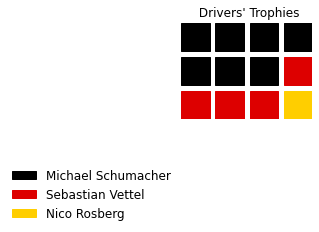

In [177]:
fig = plt.figure( 
    FigureClass = Waffle,
    starting_location='NW',
    vertical=True,
    title={'label': ' Drivers\' Trophies', 'loc': 'center'},
    rows=3,
    colors=["#000000", "#DD0000","#FFCE00"],
    values = g_driver['Number of Title'],
    legend={
'loc': 'best',
'bbox_to_anchor': (0, -0.4),
'framealpha': 0,
'fontsize': 12},
 labels = list(g_driver['Driver']))


### 4. Constructor Titles

In [161]:
champions_car= f1.groupby(['Season','Constructor'])['Constructor'].size().unstack()
champions_car.loc['Total',:]= champions_car.sum()
champions_car

Constructor,Alfa Romeo,BRM,Benetton,Brabham,Brawn,Cooper,Ferrari,Lotus,Maserati,Matra,McLaren,Mercedes,Red Bull,Renault,Tyrrell,Williams
Season,,,,,,,,,,,,,,,,
1950,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [162]:
list_champion_car= champions_car.loc['Total',:]
df4= pd.DataFrame(data= list_champion_car)
df4=df4.sort_values(by='Total',ascending=False)
df4.reset_index(level=0, inplace=True)
df4.rename(columns={'Total':'Constructor Champions'}, inplace=True)
df4= df4.loc[:4,:]
df4

,Constructor,Constructor Champions
0,Ferrari,15.0
1,McLaren,12.0
2,Mercedes,8.0
3,Williams,7.0
4,Lotus,6.0


In [163]:
fig = px.pie(df4, values='Constructor Champions', names='Constructor',
      title='All-time Constructor Titles', color_discrete_sequence= px.colors.sequential.RdBu)
            
fig.update_traces(textposition='inside', textinfo='label+value', showlegend=False)

fig.show()


### 5. Engine Titles

In [164]:
champions_engine= f1.groupby(['Season','Engine'])['Engine'].size().unstack()
champions_engine.loc['Total',:]= champions_engine.sum(axis=0)
champions_engine

Engine,Alfa Romeo,BMW,BRM,Climax,Ferrari,Ford,Honda,Maserati,Mercedes,Renault,Repco,TAG
Season,,,,,,,,,,,,
1950,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [165]:
list_champions_engine=champions_engine.loc['Total',:]
df5=pd.DataFrame(data=list_champions_engine)
df5=df5.sort_values(by='Total', ascending=False)
df5.reset_index(level=0, inplace=True)
df5.rename(columns={'Total':'Engine Champions'}, inplace=True)
df5= df5.loc[:4,:]
df5

,Engine,Engine Champions
0,Ferrari,15.0
1,Ford,13.0
2,Mercedes,12.0
3,Renault,11.0
4,Honda,5.0


In [166]:
fig = px.bar(df5, y="Engine", x="Engine Champions", color="Engine", orientation="h", 
             color_discrete_map={
                "Ferrari": "#ff2800",
                "Ford": "gray",
                "Mercedes": "gray",
                "Renault": "gray",
                "Honda": "gray"},
                title="All-time Engine Titles"
            )
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_traces( showlegend=False)

fig.show()

### 6. Percentage Points

In [167]:
df6= f1.copy()
df6.drop(columns=['Driver', 'Age', 'Constructor','Engine','Points','Country'], inplace=True)
df6['5-yrs Avg.Points (%)'] = df6['% Points'].rolling(5).mean()
df6.head()

,Season,% Points,5-yrs Avg.Points (%)
0,1950,83.33,NaN
1,1951,86.11,NaN
2,1952,100.00,NaN
3,1953,95.83,NaN
4,1954,93.33,91.72


In [168]:
fig = px.line(df6, x='Season', y=['% Points','5-yrs Avg.Points (%)'],
             labels={'value':'Points','variable' : 'Legends'},
             title= '% Points Achievable Towards Title')
fig.update_layout(
    font=dict(
        family="Tw Cent",
        size=18
    )
)
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
# Show plot 
fig.show()

### 7. Age Distribution

In [169]:
df7= f1.copy()


In [170]:
fig = px.histogram(df7, x='Age', nbins=5, title='Age Distribution ')

fig.show()

In [171]:
df7= df7.loc[(df7['Age'] == df7['Age'].max()) | (df7.Age == df7.Age.min())]
df7

,Season,Driver,Age,Constructor,Engine,Points,% Points,Country
7,1957,Juan Manuel Fangio,46,Maserati,Maserati,40.0,88.89,Argentina
58,2008,Lewis Hamilton,23,McLaren,Mercedes,98.0,54.44,United Kingdom
60,2010,Sebastian Vettel,23,Red Bull,Renault,256.0,53.90,Germany
